<img src="logo-MMU.png" style="height: 140px; width: 400px" align=center> 


# Machine Learning Project


# sentiment analysis on Women's Clothing E-Commerce Reviews

>#### Group ID : ML1_T2220
> #### Group Members:

| ID | Name |Specialization | Contribution |
|-----------|--------------------|-------------|----|
|1211309776 |Jennifer Lo Foh Wei |Data Science |CNN |
|1191302190 |Amin Ahmed          |Data Science |RNN |
|1171103208 |Obai Ali            |Data Science |FNN |


# Abstract 

This report examines sentiment analysis on the Women's Clothing E-Commerce Reviews dataset using machine learning. In our study, we employed Recurrent Neural Network (RNN), Convolutional Neural Network (CNN), and Feedforward Neural Network (FNN) models. The preprocessing steps involved exploration of the data, removal of punctuation and conversion to lowercase, tokenization, stop word removal, lemmatization, and removal of non-English words. The models were evaluated based on their performance, with detailed comparison presented in the report. The results underline the effectiveness of deep learning techniques for sentiment analysis in the e-commerce sector, having substantial implications for businesses looking to extract value from customer feedback data. 

# import libraries

for using google colab run this cell

In [1]:
#!apt install -qq enchant
#!pip install keras-tuner
#!pip install pyenchant

In [2]:
import pandas as pd
import numpy as np
import re
import string
import math
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import enchant
import tensorflow as tf
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

# Handling Imbalanced Data
from imblearn.under_sampling import NearMiss
from collections import Counter

# Visualizing Wordcloud
from wordcloud import WordCloud

In [3]:
import nltk
nltk.download('punkt')
nltk.download('words')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amins\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\amins\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amins\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amins\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\amins\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Data Understanding

In [4]:
import pandas as pd
#Read the dataFrame
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv',
                 skiprows=1,
                 names=['','Clothing_ID','Age','Title','Review_Text','Rating','Recommended_IND','Positive_Feedback_Count','Division_Name','Department_Name','Class_Name'])
df.head()

,,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
df.shape

(23486, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0                            23486 non-null  int64 
 1   Clothing_ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review_Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended_IND          23486 non-null  int64 
 7   Positive_Feedback_Count  23486 non-null  int64 
 8   Division_Name            23472 non-null  object
 9   Department_Name          23472 non-null  object
 10  Class_Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [7]:
df['Recommended_IND'] = df['Recommended_IND'].replace(0, 'Not Recommended')
df['Recommended_IND'] = df['Recommended_IND'].replace(1, 'Recommended')

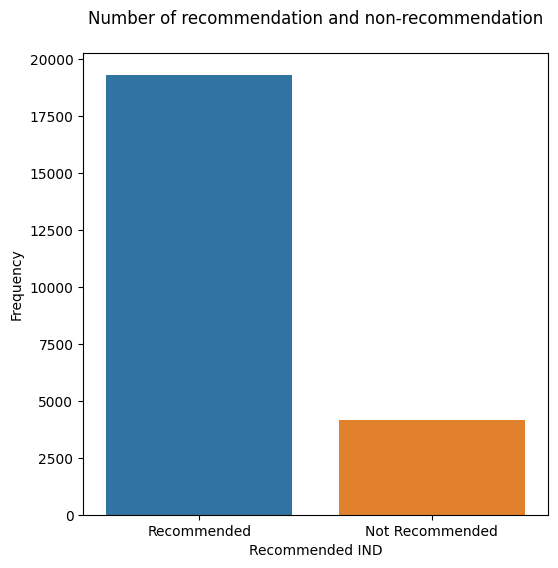

In [8]:
#display the chart
# Bar chart
import matplotlib.pyplot as plt
import seaborn as sns
# Print Bar Chart
plt.figure(figsize=(6,6))
sns.countplot(data = df, x = 'Recommended_IND')
sns.set_palette('PuBuGn_d')
plt.title("Number of recommendation and non-recommendation\n")
plt.ylabel("Frequency")
plt.xlabel("Recommended IND")
#plt.yticks(np.arange(0,190,10))
plt.show()


Recommended        19314
Not Recommended     4172
Name: Recommended_IND, dtype: int64


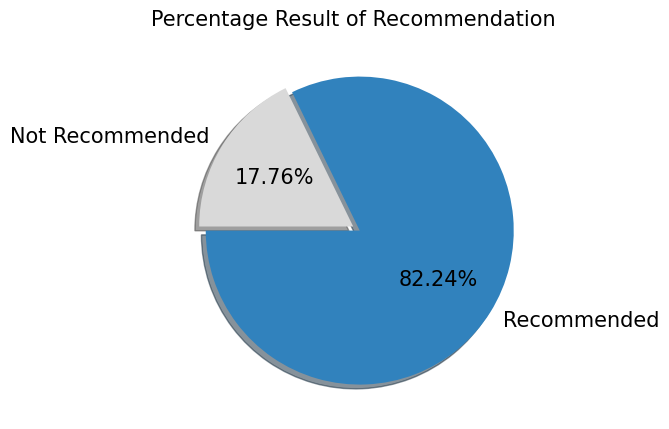

In [9]:
# Print Pie Chart
Recommended_IND = df.Recommended_IND.value_counts()
print(Recommended_IND)

plt.figure(figsize=(5,5))
Recommended_IND.plot.pie(autopct = '%1.2f%%', shadow = True, explode = (0.05,0), cmap = 'tab20c',startangle = 180, fontsize = 15)
plt.title("Percentage Result of Recommendation",fontsize = 15)
plt.xlabel('')
plt.ylabel('')
plt.show()

In [10]:
df['Recommended_IND'] = df['Recommended_IND'].replace('Not Recommended',0)
df['Recommended_IND'] = df['Recommended_IND'].replace('Recommended',1)

# Data Preprocessing

## Remove Unwanted Columns


In [11]:
df = df.loc[:, df.columns.intersection(['Review_Text','Recommended_IND'])]
print(f'Updated Shape of Data: {df.shape}')

Updated Shape of Data: (23486, 2)


In [12]:
df.reset_index(drop=True, inplace=True)
df.head()

,Review_Text,Recommended_IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


## Handle Missing Value

### Check missing value


In [13]:
#check missing value
nullValue = df.isnull().any()
nullValue


Review_Text         True
Recommended_IND    False
dtype: bool

In [14]:
# Check missing values
df.isnull().sum()

Review_Text        845
Recommended_IND      0
dtype: int64

In [15]:
# total missing values
t_cells = np.product(df.shape)
t_missing = df.isnull().sum().sum() # total missing value for all the variable
# percentage of missing data
percent_missing = (t_missing/t_cells) * 100
print("Percentage of missing value: {:.2f}%".format(percent_missing))

Percentage of missing value: 1.80%


In [16]:
# Drop out missing values for all columns
df = df.dropna(how='any')


In [17]:
# after dropping missing value
df.shape

(22641, 2)

In [18]:
X = np.array(df.iloc[:, df.columns != 'Recommended_IND'])
y = np.array(df.iloc[:, df.columns == 'Recommended_IND'])

In [19]:
#double comfirm missing value
nullValue = df.isnull().any()
nullValue

Review_Text        False
Recommended_IND    False
dtype: bool

## Remove Punctuation and Convert to Lower-case

In [20]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
def text_clean(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[''""…]', '', text)
    text = re.sub('\n', '', text)
    text= text.strip()

    return text

cleaned = lambda x: text_clean(x)

In [22]:
df['New_Review_Text'] = df['Review_Text'].apply(cleaned)
df.head(10)

,Review_Text,Recommended_IND,New_Review_Text
0,Absolutely wonderful - silky and sexy and comf...,1,absolutely wonderful silky and sexy and comfo...
1,Love this dress! it's sooo pretty. i happene...,1,love this dress its sooo pretty i happened t...
2,I had such high hopes for this dress and reall...,0,i had such high hopes for this dress and reall...
3,"I love, love, love this jumpsuit. it's fun, fl...",1,i love love love this jumpsuit its fun flirty ...
4,This shirt is very flattering to all due to th...,1,this shirt is very flattering to all due to th...
5,"I love tracy reese dresses, but this one is no...",0,i love tracy reese dresses but this one is not...
6,I aded this in my basket at hte last mintue to...,1,i aded this in my basket at hte last mintue to...
7,"I ordered this in carbon for store pick up, an...",1,i ordered this in carbon for store pick up and...
8,I love this dress. i usually get an xs but it ...,1,i love this dress i usually get an xs but it r...
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",1,im and lbs i ordered the s petite to make su...


## NLTK Tokenisation

In [23]:
def tokens(text):
    tokens = nltk.word_tokenize(str(text))
    # take only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

cleaned1 = lambda x: tokens(x)

In [24]:
df['New_Review_Text'] = df['New_Review_Text'].apply(cleaned1)
df.head(10)

,Review_Text,Recommended_IND,New_Review_Text
0,Absolutely wonderful - silky and sexy and comf...,1,"[absolutely, wonderful, silky, and, sexy, and,..."
1,Love this dress! it's sooo pretty. i happene...,1,"[love, this, dress, its, sooo, pretty, i, happ..."
2,I had such high hopes for this dress and reall...,0,"[i, had, such, high, hopes, for, this, dress, ..."
3,"I love, love, love this jumpsuit. it's fun, fl...",1,"[i, love, love, love, this, jumpsuit, its, fun..."
4,This shirt is very flattering to all due to th...,1,"[this, shirt, is, very, flattering, to, all, d..."
5,"I love tracy reese dresses, but this one is no...",0,"[i, love, tracy, reese, dresses, but, this, on..."
6,I aded this in my basket at hte last mintue to...,1,"[i, aded, this, in, my, basket, at, hte, last,..."
7,"I ordered this in carbon for store pick up, an...",1,"[i, ordered, this, in, carbon, for, store, pic..."
8,I love this dress. i usually get an xs but it ...,1,"[i, love, this, dress, i, usually, get, an, xs..."
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",1,"[im, and, lbs, i, ordered, the, s, petite, to,..."


## Remove Stopwords

In [25]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
  remove = [w for w in text if w not in stop_words]
  return remove

cleaned2 = lambda x: remove_stopwords(x)

In [26]:
df['New_Review_Text'] = df['New_Review_Text'].apply(cleaned2)
df.head(10)

,Review_Text,Recommended_IND,New_Review_Text
0,Absolutely wonderful - silky and sexy and comf...,1,"[absolutely, wonderful, silky, sexy, comfortable]"
1,Love this dress! it's sooo pretty. i happene...,1,"[love, dress, sooo, pretty, happened, find, st..."
2,I had such high hopes for this dress and reall...,0,"[high, hopes, dress, really, wanted, work, ini..."
3,"I love, love, love this jumpsuit. it's fun, fl...",1,"[love, love, love, jumpsuit, fun, flirty, fabu..."
4,This shirt is very flattering to all due to th...,1,"[shirt, flattering, due, adjustable, front, ti..."
5,"I love tracy reese dresses, but this one is no...",0,"[love, tracy, reese, dresses, one, petite, fee..."
6,I aded this in my basket at hte last mintue to...,1,"[aded, basket, hte, last, mintue, see, would, ..."
7,"I ordered this in carbon for store pick up, an...",1,"[ordered, carbon, store, pick, ton, stuff, alw..."
8,I love this dress. i usually get an xs but it ...,1,"[love, dress, usually, get, xs, runs, little, ..."
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",1,"[im, lbs, ordered, petite, make, sure, length,..."


## Lemmetisation

In [27]:
# Lemmatize the verb
def lem1(text):
    wordnet = WordNetLemmatizer()
    lemma_words = []
    for w in text:
      lemma_words.append(wordnet.lemmatize(w,'v'))

    return lemma_words

cleaned3 = lambda x: lem1(x)

In [28]:
df['New_Review_Text'] = df['New_Review_Text'].apply(cleaned3)
df.head(10)

,Review_Text,Recommended_IND,New_Review_Text
0,Absolutely wonderful - silky and sexy and comf...,1,"[absolutely, wonderful, silky, sexy, comfortable]"
1,Love this dress! it's sooo pretty. i happene...,1,"[love, dress, sooo, pretty, happen, find, stor..."
2,I had such high hopes for this dress and reall...,0,"[high, hop, dress, really, want, work, initial..."
3,"I love, love, love this jumpsuit. it's fun, fl...",1,"[love, love, love, jumpsuit, fun, flirty, fabu..."
4,This shirt is very flattering to all due to th...,1,"[shirt, flatter, due, adjustable, front, tie, ..."
5,"I love tracy reese dresses, but this one is no...",0,"[love, tracy, reese, dress, one, petite, feet,..."
6,I aded this in my basket at hte last mintue to...,1,"[aded, basket, hte, last, mintue, see, would, ..."
7,"I ordered this in carbon for store pick up, an...",1,"[order, carbon, store, pick, ton, stuff, alway..."
8,I love this dress. i usually get an xs but it ...,1,"[love, dress, usually, get, xs, run, little, s..."
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",1,"[im, lbs, order, petite, make, sure, length, w..."


In [29]:
# Lemmatize the nouns
def lem2(text):
    wordnet = WordNetLemmatizer()
    lemma_words = []
    for w in text:
      lemma_words.append(wordnet.lemmatize(w,'n'))

    return lemma_words

cleaned4 = lambda x: lem2(x)

In [30]:
df['New_Review_Text'] = df['New_Review_Text'].apply(cleaned4)
df.head(10)

,Review_Text,Recommended_IND,New_Review_Text
0,Absolutely wonderful - silky and sexy and comf...,1,"[absolutely, wonderful, silky, sexy, comfortable]"
1,Love this dress! it's sooo pretty. i happene...,1,"[love, dress, sooo, pretty, happen, find, stor..."
2,I had such high hopes for this dress and reall...,0,"[high, hop, dress, really, want, work, initial..."
3,"I love, love, love this jumpsuit. it's fun, fl...",1,"[love, love, love, jumpsuit, fun, flirty, fabu..."
4,This shirt is very flattering to all due to th...,1,"[shirt, flatter, due, adjustable, front, tie, ..."
5,"I love tracy reese dresses, but this one is no...",0,"[love, tracy, reese, dress, one, petite, foot,..."
6,I aded this in my basket at hte last mintue to...,1,"[aded, basket, hte, last, mintue, see, would, ..."
7,"I ordered this in carbon for store pick up, an...",1,"[order, carbon, store, pick, ton, stuff, alway..."
8,I love this dress. i usually get an xs but it ...,1,"[love, dress, usually, get, x, run, little, sn..."
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",1,"[im, lb, order, petite, make, sure, length, wa..."


## Remove Non-English Words

In [31]:
dictionary = enchant.Dict("en_US")

def remove_non_english(text):
  remove = []
  for w in text:
    if dictionary.check(w):
      remove.append(w)

  return remove

cleaned5 = lambda x: remove_non_english(x)

In [32]:
df['New_Review_Text'] = df['New_Review_Text'].apply(cleaned5)
df.head(10)

,Review_Text,Recommended_IND,New_Review_Text
0,Absolutely wonderful - silky and sexy and comf...,1,"[absolutely, wonderful, silky, sexy, comfortable]"
1,Love this dress! it's sooo pretty. i happene...,1,"[love, dress, pretty, happen, find, store, gla..."
2,I had such high hopes for this dress and reall...,0,"[high, hop, dress, really, want, work, initial..."
3,"I love, love, love this jumpsuit. it's fun, fl...",1,"[love, love, love, jumpsuit, fun, flirty, fabu..."
4,This shirt is very flattering to all due to th...,1,"[shirt, flatter, due, adjustable, front, tie, ..."
5,"I love tracy reese dresses, but this one is no...",0,"[love, dress, one, petite, foot, tall, usually..."
6,I aded this in my basket at hte last mintue to...,1,"[basket, last, see, would, look, like, person,..."
7,"I ordered this in carbon for store pick up, an...",1,"[order, carbon, store, pick, ton, stuff, alway..."
8,I love this dress. i usually get an xs but it ...,1,"[love, dress, usually, get, x, run, little, sn..."
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",1,"[lb, order, petite, make, sure, length, long, ..."


In [33]:
df.shape

(22641, 3)

## Join Words

In [34]:
sentences = []
for row in df['New_Review_Text']:
    sentence = ' '.join(row)
    sentences.append(sentence)
    

In [35]:
# Update the sentences in the dataframe
df['New_Review_Text'] = sentences
df.head(10)

,Review_Text,Recommended_IND,New_Review_Text
0,Absolutely wonderful - silky and sexy and comf...,1,absolutely wonderful silky sexy comfortable
1,Love this dress! it's sooo pretty. i happene...,1,love dress pretty happen find store glad never...
2,I had such high hopes for this dress and reall...,0,high hop dress really want work initially orde...
3,"I love, love, love this jumpsuit. it's fun, fl...",1,love love love jumpsuit fun flirty fabulous ev...
4,This shirt is very flattering to all due to th...,1,shirt flatter due adjustable front tie perfect...
5,"I love tracy reese dresses, but this one is no...",0,love dress one petite foot tall usually wear b...
6,I aded this in my basket at hte last mintue to...,1,basket last see would look like person store p...
7,"I ordered this in carbon for store pick up, an...",1,order carbon store pick ton stuff always try u...
8,I love this dress. i usually get an xs but it ...,1,love dress usually get x run little snug bust ...
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",1,lb order petite make sure length long typicall...


## Train Test Split

In [36]:
X = df['New_Review_Text']
y = df['Recommended_IND']

In [37]:
y = np.array(list(map(lambda x: 1 if x==1 else 0, y)))

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
print("Training Shape: ",X_train.shape)
print("Testing Shape: ",X_test.shape)

Training Shape:  (18112,)
Testing Shape:  (4529,)


# Modelling (ANN-based)

## RNN

In [40]:
from gensim.models import KeyedVectors

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from tensorflow import keras
from tensorflow.keras import layers

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, SimpleRNN
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

from kerastuner.tuners import RandomSearch

C:\Users\amins\AppData\Local\Temp\ipykernel_16316\3590939632.py:17: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


### Data Preparation

Feature Generation using Bag-of-words

In [41]:
count_vectorizer = CountVectorizer()

bag_of_words = count_vectorizer.fit_transform(df['New_Review_Text'])
feature_names = count_vectorizer.get_feature_names_out()
pd.DataFrame(bag_of_words.toarray(), columns = feature_names)

,aa,ab,abbey,abdomen,abdominal,abhor,ability,abject,able,abnormal,...,zed,zero,zig,zigzag,zillion,zip,zipper,zombie,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22638,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
22639,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Spliting the data

In [42]:
RNN_X = bag_of_words
RNN_y = df['Recommended_IND']

RNN_X_train, RNN_X_test, RNN_y_train, RNN_y_test = train_test_split(RNN_X, RNN_y, test_size=0.2, random_state=42)

SMOTE the data to to balance the number of occurence of a label

In [43]:
sm = SMOTE(random_state=0)
RNN_X_train, RNN_y_train = sm.fit_resample(RNN_X_train, RNN_y_train.ravel())


Converting the data to the right shape for the model

In [44]:
RNN_X_train = np.reshape(RNN_X_train.toarray(), (RNN_X_train.shape[0], 1, RNN_X_train.shape[1]))
RNN_X_test = np.reshape(RNN_X_test.toarray(), (RNN_X_test.shape[0], 1, RNN_X_test.shape[1]))

Split the training set into training and validation sets

In [ ]:
RNN_X_train, RNN_X_val, RNN_y_train, RNN_y_val = train_test_split(RNN_X_train, RNN_y_train, test_size=0.1, random_state=42)

### Hyperparameter Tuning

 Using Keras Tuner

In [45]:
def RNN_build_model(hp):
    model = Sequential()

    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    hp_momentum = hp.Float('momentum', min_value=0, max_value=1, step=0.1)
    hp_activation = hp.Choice('activation', values=['relu', 'tanh', 'sigmoid'])

    model.add(SimpleRNN(units=hp_units, activation=hp_activation, input_shape=(RNN_X_train.shape[1], RNN_X_train.shape[2])))

    for i in range(hp.Int('num_layers', 1, 4)):
        model.add(Dense(units=hp_units, activation=hp_activation))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=keras.optimizers.SGD(learning_rate=hp_learning_rate, momentum=hp_momentum),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

Applying random search method

In [ ]:
RNN_tuner = RandomSearch(
    RNN_build_model,
    objective='val_accuracy',
    max_trials=50,
    executions_per_trial=1,
    directory='Tuning',
    project_name='RNN_Hyper_Tuning')

Hyperparameter Tuner Summary

In [ ]:
RNN_tuner.search_space_summary()

Search

In [ ]:
RNN_tuner.search(RNN_X_train, RNN_y_train, epochs=3, validation_data=(RNN_X_val, RNN_y_val))

Get the Optimal Hyperparameters

In [ ]:
RNN_results = RNN_tuner.get_best_hyperparameters(num_trials=1)[0].values
print('The hyperparameter search is complete. \nThe optimal Parameters are:\n')
# Print the results
for hyperparam in RNN_results:
    print(f"{hyperparam}: {RNN_results[hyperparam]}")

In [ ]:
# Get the trial information into a dataframe
RNN_trials = RNN_tuner.oracle.trials
RNN_trial_info = {t: RNN_trials[t].hyperparameters.values for t in RNN_trials}
RNN_trial_info = pd.DataFrame(RNN_trial_info).T

# Add score information to the dataframe
RNN_trial_scores = {t: RNN_trials[t].score for t in RNN_trials}
RNN_trial_info['score'] = RNN_trial_info.index.map(RNN_trial_scores)

# Determine the number of rows and columns for subplots
num_hyperparams = len(RNN_trial_info.columns) - 1
num_rows = int((num_hyperparams + 1) / 2)
num_cols = 2

# Create a figure and axes for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 15))
axes = axes.flatten()

# For each hyperparameter
for i, hyperparam in enumerate(RNN_trial_info.columns):
    # Skip the score
    if hyperparam == 'score':
        continue

    ax = axes[i]

    # Check if the column is categorical
    if RNN_trial_info[hyperparam].dtype == 'object':
        # Create a box plot
        sns.boxplot(data=RNN_trial_info, x=RNN_trial_info[hyperparam], y='score', ax=ax)
        ax.set_xlabel(hyperparam)
        ax.set_ylabel('Validation Accuracy')
    else:
        # Create a scatter plot
        sns.scatterplot(data=RNN_trial_info, x=hyperparam, y='score', ax=ax, alpha=0.5)

        # If the hyperparameter is learning_rate, use a log scale
        if hyperparam == 'learning_rate':
            ax.set_xscale('log')

        # Add density estimation
        sns.kdeplot(data=RNN_trial_info, x=hyperparam, y='score', ax=ax, cmap='viridis', shade=True)

        ax.set_xlabel(hyperparam)
        ax.set_ylabel('Validation Accuracy')

    ax.set_title(f'Effect of {hyperparam} on Validation Accuracy')

# Adjust the layout and spacing
plt.tight_layout()

plt.show()

### Building the RNN model

Get the optimal hyperparameters

In [ ]:
RNN_best_hps = RNN_tuner.get_best_hyperparameters(num_trials=1)[0]

Build the model with the optimal hyperparameters

In [ ]:
RNN_model = RNN_tuner.hypermodel.build(RNN_best_hps)

Early stopping callback

In [ ]:
RNN_es_call = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

Model summry

In [ ]:
RNN_model.summary()

Model Training

In [ ]:
RNN_history = RNN_model.fit(RNN_X_train, RNN_y_train, epochs=15, batch_size=32, validation_data=(RNN_X_val, RNN_y_val), callbacks=[RNN_es_call])

### Evaluation

Plot training & validation of accuracy & loss values

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(RNN_history.history['accuracy'], color='blue', label='Train')
plt.plot(RNN_history.history['val_accuracy'], color='orange', label='Validation')
plt.title('RNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(RNN_history.history['loss'], color='blue', label='Train')
plt.plot(RNN_history.history['val_loss'], color='orange', label='Validation')
plt.title('RNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


Prediction Evaluation

In [ ]:
# Get the model's predictions on the test set
RNN_y_pred = RNN_model.predict(RNN_X_test)
RNN_y_pred = (RNN_y_pred > 0.5)  # convert probabilities to binary output

# Compute the accuracy of the model
RNN_accuracy = accuracy_score(RNN_y_test, RNN_y_pred)
print(f'Accuracy: {RNN_accuracy}')

# Compute the recall of the model
RNN_recall = recall_score(RNN_y_test, RNN_y_pred)
print(f'Recall: {RNN_recall}')

# Compute the precision of the model
RNN_precision = precision_score(RNN_y_test, RNN_y_pred)
print(f'Precision: {RNN_precision}')

# Compute the F1 score of the model
RNN_f1 = f1_score(RNN_y_test, RNN_y_pred)
print(f'F1 Score: {RNN_f1}')

---

## CNN

### Word Embeddings

In [ ]:
import keras
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, LSTM
from keras.layers import Conv1D, Flatten, GlobalMaxPooling1D
import numpy as np
from keras.preprocessing import text

Prepare Embedding Layer

In [ ]:
maxlen=1000

Keras Tokenization

In [ ]:
CNN_X_train = X_train
CNN_X_test = X_test

CNN_y_train = y_train
CNN_y_test = y_test

# Verify the number of samples in the feature and target arrays
print("Number of samples in CNN_X_train:", len(CNN_X_train))
print("Number of samples in CNN_X_test:", len(CNN_X_test))
print("Number of samples in CNN_y_train:", len(CNN_y_train))
print("Number of samples in CNN_y_test:", len(CNN_y_test))

In [ ]:
tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(CNN_X_train)
CNN_X_train = tokenizer.texts_to_matrix(CNN_X_train)
CNN_X_test = tokenizer.texts_to_matrix(CNN_X_test)

vocab_size = 1000

CNN_X_train = pad_sequences(CNN_X_train, maxlen=maxlen)
CNN_X_test = pad_sequences(CNN_X_test, maxlen=maxlen)

In [ ]:
embeddings_index = dict()
f = open('/content/drive/Shared drives/TDS3851 Assignment/glove/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

embedding_matrix = np.zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    if index > vocab_size - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

In [ ]:
embedding_matrix.shape

### Hyperparameter Tuning

In [ ]:
maxlen = 1000

In [ ]:
def CNN_build_model(hp):
    CNN_model = Sequential()

    embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
    CNN_model.add(embedding_layer)

    hp_filters = hp.Int('filter', min_value=32, max_value=128, step=16)
    hp_kernel_sizes = hp.Choice('kernel', values = [3,5])
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    hp_momentum = hp.Float('momentum', min_value=0, max_value=1, step=0.1)
    hp_activation = hp.Choice('activation', values=['relu', 'tanh', 'sigmoid'])


    CNN_model.add(Conv1D(filters=hp_filters, kernel_size=hp_kernel_sizes, activation=hp_activation))
    CNN_model.add(GlobalMaxPooling1D())
    CNN_model.add(Dense(1, activation='sigmoid'))

    # CNN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    CNN_model.compile(optimizer=keras.optimizers.SGD(learning_rate=hp_learning_rate, momentum=hp_momentum),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

    return CNN_model

In [ ]:
CNN_tuner=RandomSearch(
    CNN_build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='Tuning',
    project_name='CNN_Hyper_Tuning')

In [ ]:
CNN_tuner.search_space_summary()

In [ ]:
CNN_tuner.search(CNN_X_train,CNN_y_train,epochs=3, validation_data=(CNN_X_test, CNN_y_test))

Get the optimal hyperparameters

In [ ]:
CNN_results = CNN_tuner.get_best_hyperparameters(num_trials=1)[0].values
print('The hyperparameter search is complete. \nThe optimal Parameters are:\n')
# Print the results
for hyperparam in CNN_results:
    print(f"{hyperparam}: {CNN_results[hyperparam]}")

In [ ]:
# Get the trial information into a dataframe
CNN_trials = CNN_tuner.oracle.trials
CNN_trial_info = {t: CNN_trials[t].hyperparameters.values for t in CNN_trials}
CNN_trial_info = pd.DataFrame(CNN_trial_info).T

# Add score information to the dataframe
CNN_trial_scores = {t: CNN_trials[t].score for t in CNN_trials}
CNN_trial_info['score'] = CNN_trial_info.index.map(CNN_trial_scores)

# Determine the number of rows and columns for subplots
num_hyperparams = len(CNN_trial_info.columns) - 1
num_rows = int((num_hyperparams + 1) / 2)
num_cols = 2

# Create a figure and axes for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 15))
axes = axes.flatten()

# For each hyperparameter
for i, hyperparam in enumerate(CNN_trial_info.columns):
    # Skip the score
    if hyperparam == 'score':
        continue

    ax = axes[i]

    # Check if the column is categorical
    if CNN_trial_info[hyperparam].dtype == 'object':
        # Create a box plot
        sns.scatterplot(data=CNN_trial_info, x=CNN_trial_info[hyperparam], y='score', ax=ax)
        ax.set_xlabel(hyperparam)
        ax.set_ylabel('Validation Accuracy')
    else:
        # Create a scatter plot
        sns.scatterplot(data=CNN_trial_info, x=hyperparam, y='score', ax=ax, alpha=0.5)

        # If the hyperparameter is learning_rate, use a log scale
        if hyperparam == 'learning_rate':
            ax.set_xscale('log')

        # Add density estimation
        sns.kdeplot(data=CNN_trial_info, x=hyperparam, y='score', ax=ax, cmap='viridis', fill=True)

        ax.set_xlabel(hyperparam)
        ax.set_ylabel('Validation Accuracy')

    ax.set_title(f'Effect of {hyperparam} on Validation Accuracy')

# Adjust the layout and spacing
plt.tight_layout()

plt.show()

### Building the CNN Model

Get the optimal hyperparameters

In [ ]:
CNN_best_hps = CNN_tuner.get_best_hyperparameters(num_trials=1)[0]

Build the model with the optimal hyperparameters

In [ ]:
CNN_model = CNN_tuner.hypermodel.build(CNN_best_hps)

Model Summary

In [ ]:
CNN_model.summary()

Model Training

In [ ]:
CNN_history = CNN_model.fit(CNN_X_train, CNN_y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

### Evaluation

Plot Training & Validation of Accuracy & Loss Values

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(CNN_history.history['accuracy'], color='blue', label='Train')
plt.plot(CNN_history.history['val_accuracy'], color='orange', label='Validation')
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(CNN_history.history['loss'], color='blue', label='Train')
plt.plot(CNN_history.history['val_loss'], color='orange', label='Validation')
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Prediction Evaluation

In [ ]:
# Get the model's predictions on the test set
CNN_y_pred = CNN_model.predict(CNN_X_test)
CNN_y_pred = (CNN_y_pred > 0.5).astype(int)

# Compute the accuracy of the model
CNN_accuracy = accuracy_score(CNN_y_test, CNN_y_pred)
print(f'Accuracy: {CNN_accuracy}')

# Compute the recall of the model
CNN_recall = recall_score(CNN_y_test, CNN_y_pred)
print(f'Recall: {CNN_recall}')

# Compute the precision of the model
CNN_precision = precision_score(CNN_y_test, CNN_y_pred)
print(f'Precision: {CNN_precision}')

# Compute the F1 score of the model
CNN_f1 = f1_score(CNN_y_test, CNN_y_pred)
print(f'F1 Score: {CNN_f1}')


---


## FNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [ ]:
# define the model
FNN_model = Sequential()

In [ ]:
# Convert the training set to an array if it's a sparse matrix
if hasattr(X_train, 'toarray'):
    X_train_array = X_train.toarray()
else:
    X_train_array = np.array(X_train)

### Hyperparameter Tuning

In [ ]:
# Define the space of hyperparameters
space = {
    'units_1': hp.choice('units_1', range(50, 300)),
    'units_2': hp.choice('units_2', range(25, 150)),
    'learning_rate': hp.loguniform('learning_rate', -5, -2)
}

# Define the objective function
def objective(params):
    FNN_model = Sequential()
    FNN_model.add(Dense(units=int(params['units_1']), activation='relu', input_dim=X_train_array.shape[1]))
    FNN_model.add(Dense(units=int(params['units_2']), activation='relu'))
    FNN_model.add(Dense(units=1, activation='sigmoid'))
    optimizer = Adam(lr=params['learning_rate'])
    FNN_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    history = FNN_model.fit(X_train_array, y_train, epochs=3, verbose=0)
    accuracy = history.history['accuracy'][-1]

    return {'loss': -accuracy, 'status': STATUS_OK}



In [ ]:
# Run the optimization
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10,
            trials=trials)

Get the optimal hyperparameters

In [ ]:
print("Best hyperparameters: ", best)

In [ ]:
# Extract loss from trials
losses = [trial['result']['loss'] for trial in trials.trials]

# Extract hyperparameters from trials
units_1_values = [trial['misc']['vals']['units_1'][0] for trial in trials.trials]
units_2_values = [trial['misc']['vals']['units_2'][0] for trial in trials.trials]
learning_rates = [trial['misc']['vals']['learning_rate'][0] for trial in trials.trials]

# Create subplots
fig, axs = plt.subplots(3)

# Plot units_1 values
axs[0].plot(units_1_values, losses, 'o')
axs[0].set_title('units_1 values')
axs[0].set(xlabel='units_1', ylabel='Loss')

# Plot units_2 values
axs[1].plot(units_2_values, losses, 'o')
axs[1].set_title('units_2 values')
axs[1].set(xlabel='units_2', ylabel='Loss')

# Plot learning_rate values
axs[2].plot(learning_rates, losses, 'o')
axs[2].set_title('Learning rate values')
axs[2].set(xlabel='Learning rate', ylabel='Loss')

# Display the plots
plt.tight_layout()
plt.show()


### Building the FNN Model

In [ ]:
# Define the space of hyperparameters as lists so we can extract the 'best' values later
units_1_options = list(range(50, 300))
units_2_options = list(range(25, 150))

space = {
    'units_1': hp.choice('units_1', units_1_options),
    'units_2': hp.choice('units_2', units_2_options),
    'learning_rate': hp.loguniform('learning_rate', -5, -2)
}

# After running the optimization, retrieve best hyperparameters

best_units_1 = units_1_options[best['units_1']]
best_units_2 = units_2_options[best['units_2']]
best_learning_rate = best['learning_rate']

# Build model with optimized hyperparameters
FNN_model = Sequential()

# Add a dense input layer
FNN_model.add(Dense(units=best_units_1, activation='relu', input_dim=X_train_array.shape[1]))

# Add another dense layer
FNN_model.add(Dense(units=best_units_2, activation='relu'))

# Add a dense output layer
FNN_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
FNN_model.compile(loss='binary_crossentropy', optimizer=Adam(lr=best_learning_rate), metrics=['accuracy'])


# Print the summary of the model
FNN_model.summary()


In [ ]:
X_train,X_val,y_train,y_val=train_test_split(X_train_array, y_train, test_size=0.2, random_state=42)

In [ ]:
# Fit the model
FNN_histroty = FNN_model.fit(X_train, y_train, epochs=5, verbose=1, validation_data=(X_val,y_val))

### Evaluation

Plot Training & Validation of Accuracy & Loss Values

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(FNN_histroty.history['accuracy'], color='blue', label='Train')
plt.plot(FNN_histroty.history['val_accuracy'], color='orange', label='Validation')
plt.title('FNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(FNN_histroty.history['loss'], color='blue', label='Train')
plt.plot(FNN_histroty.history['val_loss'], color='orange', label='Validation')
plt.title('FNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Prediction Evaluation

In [ ]:
# Threshold for classification
threshold = 0.5

# Predict probabilities and convert to binary predictions
FNN_y_pred_prob = FNN_model.predict(X_test.toarray())
FNN_y_pred = (FNN_y_pred_prob > threshold).astype(int)

In [ ]:
# Compute the accuracy of the model
FNN_accuracy = accuracy_score(y_test, FNN_y_pred)
print(f'Accuracy: {FNN_accuracy}')

# Compute the recall of the model
FNN_recall = recall_score(y_test, FNN_y_pred)
print(f'Recall: {FNN_recall}')

# Compute the precision of the model
FNN_precision = precision_score(y_test, FNN_y_pred)
print(f'Precision: {FNN_precision}')

# Compute the F1 score of the model
FNN_f1 = f1_score(y_test, FNN_y_pred)
print(f'F1 Score: {FNN_f1}')

---
# Models comparison

In [ ]:
models = ['RNN', 'CNN', 'FNN']
metrics = ['Accuracy', 'Recall', 'Precision', 'F1 Score']

accuracy_values = [RNN_accuracy, CNN_accuracy, FNN_accuracy]
recall_values = [RNN_recall, CNN_recall, FNN_recall]
precision_values = [RNN_precision, CNN_precision, FNN_precision]
f1score_values = [RNN_f1, CNN_f1, FNN_f1]

colors = ['#F29727', '#001C30', '#22A699']


# Set figure size and font style
plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 10})

# Plotting the line chart
for i in range(len(models)):
    plt.plot(metrics, [accuracy_values[i], recall_values[i], precision_values[i], f1score_values[i]],
             marker='o', color=colors[i], label=models[i], linewidth=2)

plt.xlabel('Metrics')
plt.ylabel('Percentage')
plt.title('Model Comparison')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(75, 101)

plt.show()